In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
# read the accuracy results
# for all layers

accuracy_df_complex = pd.read_csv('eval_results/probing_complex_with_inference_split.csv')
accuracy_df_complex

accuracy_df_simple = pd.read_csv('eval_results/probing_simple_with_inference_split.csv')
accuracy_df_simple

# concatenate the two dataframes
accuracy_df = pd.concat([accuracy_df_simple, accuracy_df_complex], ignore_index=True)
accuracy_df

,query_type,label_name,n_classes,n_samples,n_test,n_right,n_false,acc_all,acc_right,acc_false
0,count,NaN,4,2726,546,525,21,0.935897,0.954286,0.476190
1,recognition_shape,answer,2,5345,1069,851,218,0.980355,0.997650,0.912844
2,recognition_shape,concept,4,5345,1069,851,218,0.785781,0.780259,0.807339
3,recognition_color,answer,2,5452,1091,1057,34,0.977085,1.000000,0.264706
4,recognition_color,concept,8,5452,1091,1054,37,0.402383,0.393738,0.648649
5,recognition_shape_and_color,answer,2,5452,1091,1084,7,0.994500,1.000000,0.142857
6,recognition_shape_and_color,queried_color,8,5452,1091,1083,8,0.648029,0.650970,0.250000
7,recognition_shape_and_color,queried_shape,4,5452,1091,1085,6,0.828598,0.833180,0.000000
8,recognition_shape_and_color,concept,32,5452,1091,1084,7,0.507791,0.510148,0.142857
9,explicit_connection,connection_count,4,2244,449,228,221,0.966592,0.982456,0.950226


In [14]:
# read the accuracy results
# for per layers

accuracy_df_complex_per_layer = pd.read_csv('eval_results/layer_probing_complex_with_inference_split.csv')
accuracy_df_complex_per_layer

accuracy_df_simple_per_layer = pd.read_csv('eval_results/layer_probing_simple_with_inference_split.csv')
accuracy_df_simple_per_layer

# concatenate the two dataframes
accuracy_df_per_layer = pd.concat([accuracy_df_simple_per_layer, accuracy_df_complex_per_layer], ignore_index=True)
accuracy_df_per_layer

,query_type,label_name,layer,n_classes,n_samples,n_test,n_right,n_false,acc_all,acc_right,acc_false
0,count,NaN,0,4,2726,546,525,21,0.650183,0.649524,0.666667
1,count,NaN,1,4,2726,546,525,21,0.705128,0.704762,0.714286
2,count,NaN,2,4,2726,546,525,21,0.664835,0.664762,0.666667
3,count,NaN,3,4,2726,546,525,21,0.714286,0.720000,0.571429
4,count,NaN,4,4,2726,546,525,21,0.633700,0.636190,0.571429
...,...,...,...,...,...,...,...,...,...,...,...
1219,implicit_spatial,axis,31,2,2280,456,276,180,0.607456,0.721014,0.433333
1220,implicit_spatial,axis,32,2,2280,456,276,180,0.631579,0.735507,0.472222
1221,implicit_spatial,axis,33,2,2280,456,276,180,0.563596,0.637681,0.450000
1222,implicit_spatial,axis,34,2,2280,456,276,180,0.583333,0.637681,0.500000



1. Creating line plots in grid...


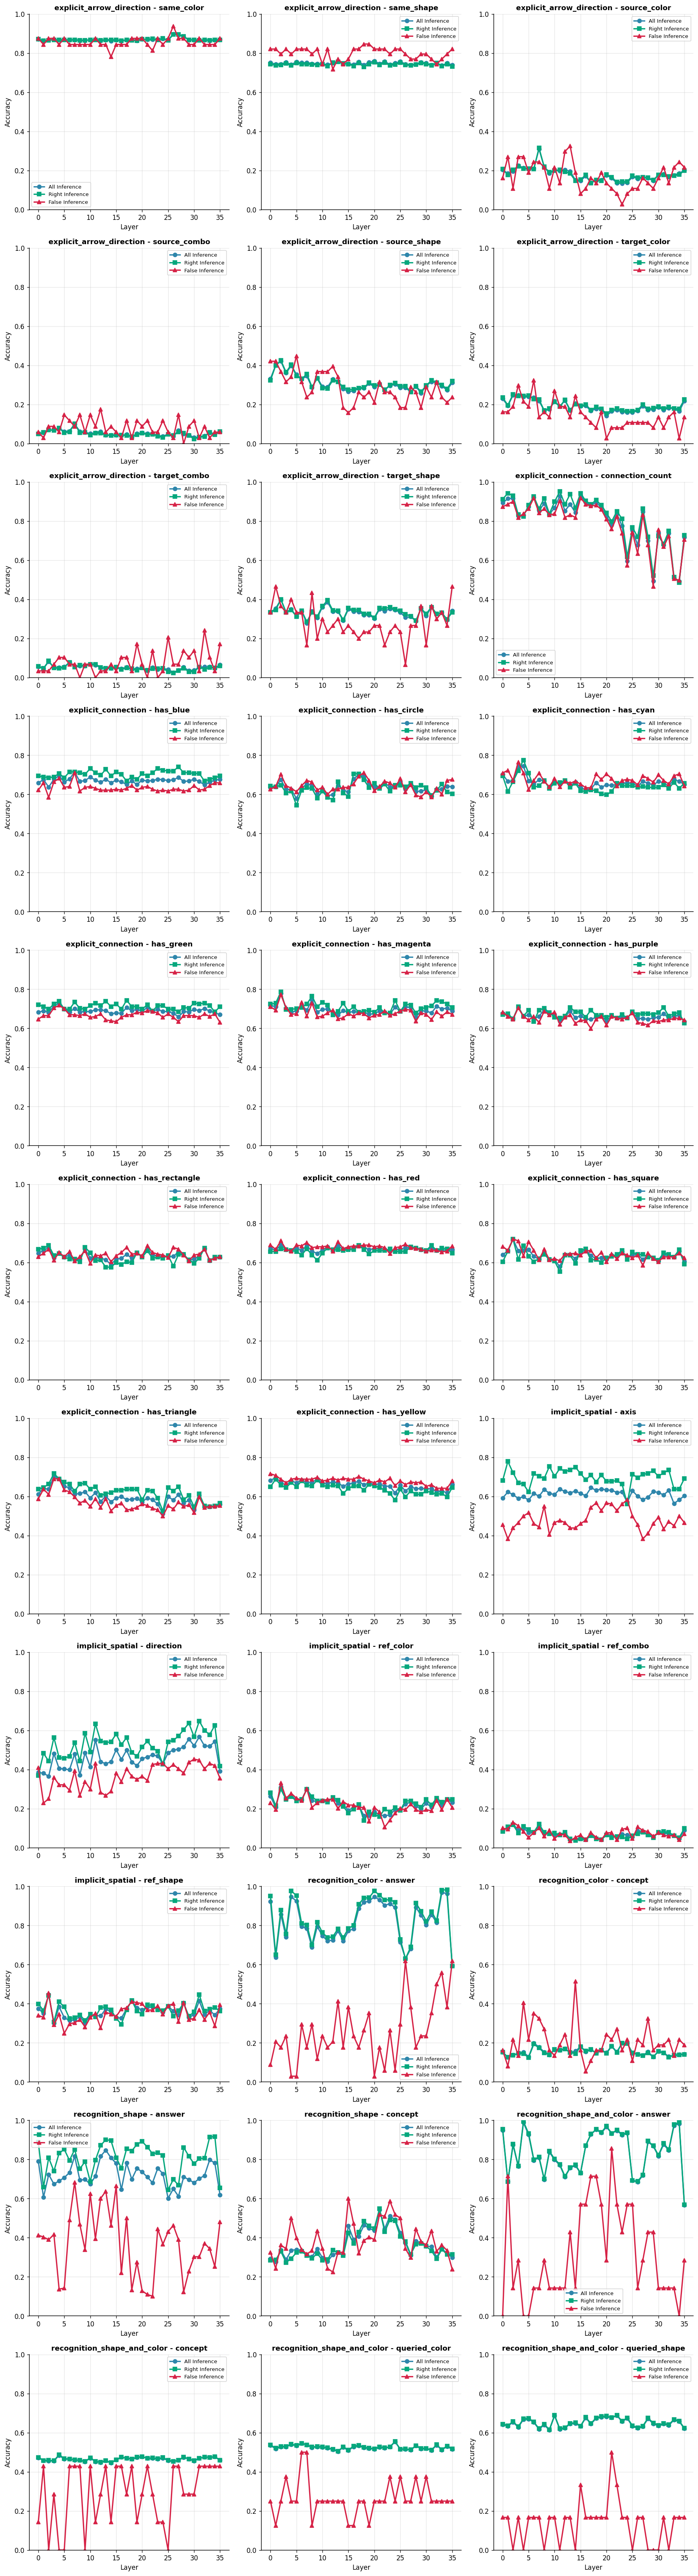

In [22]:
# =========================
# 1. LINE PLOTS - Accuracy across layers (Grid Layout)
# =========================
print("\n1. Creating line plots in grid...")

def plot_layer_accuracy_grid(df, save_prefix="complex"):
    """Plot accuracy across layers for all query types in a grid layout"""
    
    # Get unique combinations of query_type and label_name
    combinations = df.groupby(['query_type', 'label_name']).size().reset_index()[['query_type', 'label_name']]
    
    if len(combinations) == 0:
        return
    
    # Calculate grid dimensions
    n_plots = len(combinations)
    n_cols = 3  # You can adjust this
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    # Create figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
    
    # Flatten axes array for easier indexing
    if n_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if n_rows > 1 else axes
    
    # Plot each combination
    for idx, (_, row) in enumerate(combinations.iterrows()):
        query_type = row['query_type']
        label_name = row['label_name']
        
        # Filter data
        data = df[(df['query_type'] == query_type) & (df['label_name'] == label_name)]
        
        if len(data) == 0:
            continue
        
        ax = axes[idx]
        
        # Plot lines
        ax.plot(data['layer'], data['acc_all'], marker='o', linewidth=2, 
                label='All Inference', color='#2E86AB')
        
        if data['acc_right'].notna().any():
            ax.plot(data['layer'], data['acc_right'], marker='s', linewidth=2, 
                    label='Right Inference', color='#06A77D')
        
        if data['acc_false'].notna().any():
            ax.plot(data['layer'], data['acc_false'], marker='^', linewidth=2, 
                    label='False Inference', color='#D62246')
        
        ax.set_xlabel('Layer', fontsize=10)
        ax.set_ylabel('Accuracy', fontsize=10)
        ax.set_title(f'{query_type} - {label_name}', fontsize=11, fontweight='bold')
        ax.legend(fontsize=8)
        ax.grid(True, alpha=0.3)
        ax.set_ylim([0, 1])
    
    # Hide unused subplots
    for idx in range(n_plots, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Plot all query types in a grid
plot_layer_accuracy_grid(accuracy_df_per_layer, save_prefix="complex")

Overall Patterns:

* High variance in False Inference (red lines) - The red lines are extremely volatile and often drop to very low accuracy, suggesting the probing classifier struggles to decode information from incorrect model predictions. This makes sense - when the model fails, its internal representations may be noisy or inconsistent.
* More stable Right Inference (green lines) - Green lines are generally smoother and more stable, indicating that when the model predicts correctly, its internal representations are more consistent and decodable.
* All Inference (blue) tracks between the two - As expected, the overall accuracy falls between correct and incorrect cases.

Query Type Differences:

* Connection-based tasks (explicit_connection, explicit_arrow_direction) show dramatic differences between right/false inference, with false inference often near random
* Recognition tasks (recognition_shape, recognition_color) are more stable across all inference types
* Spatial tasks show moderate separation between right and false

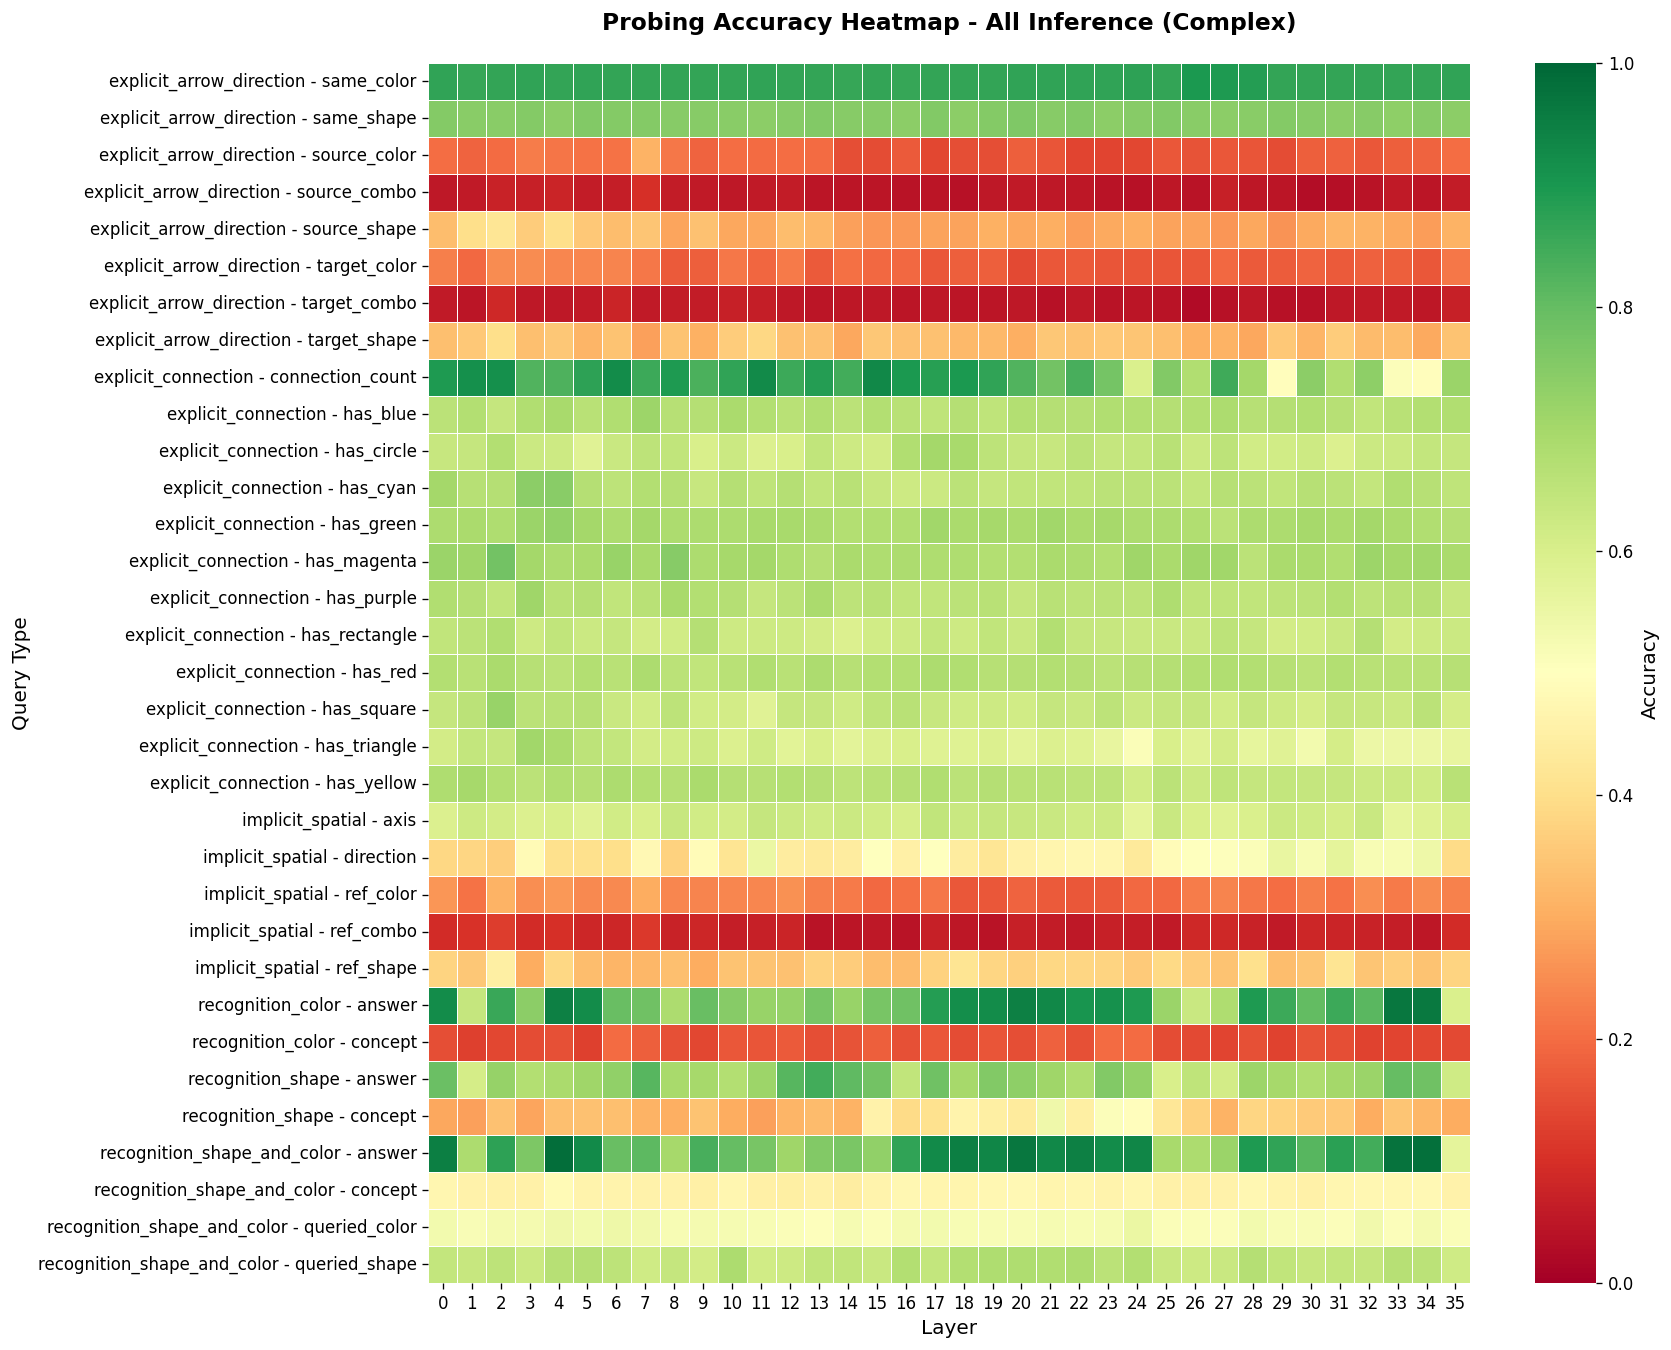

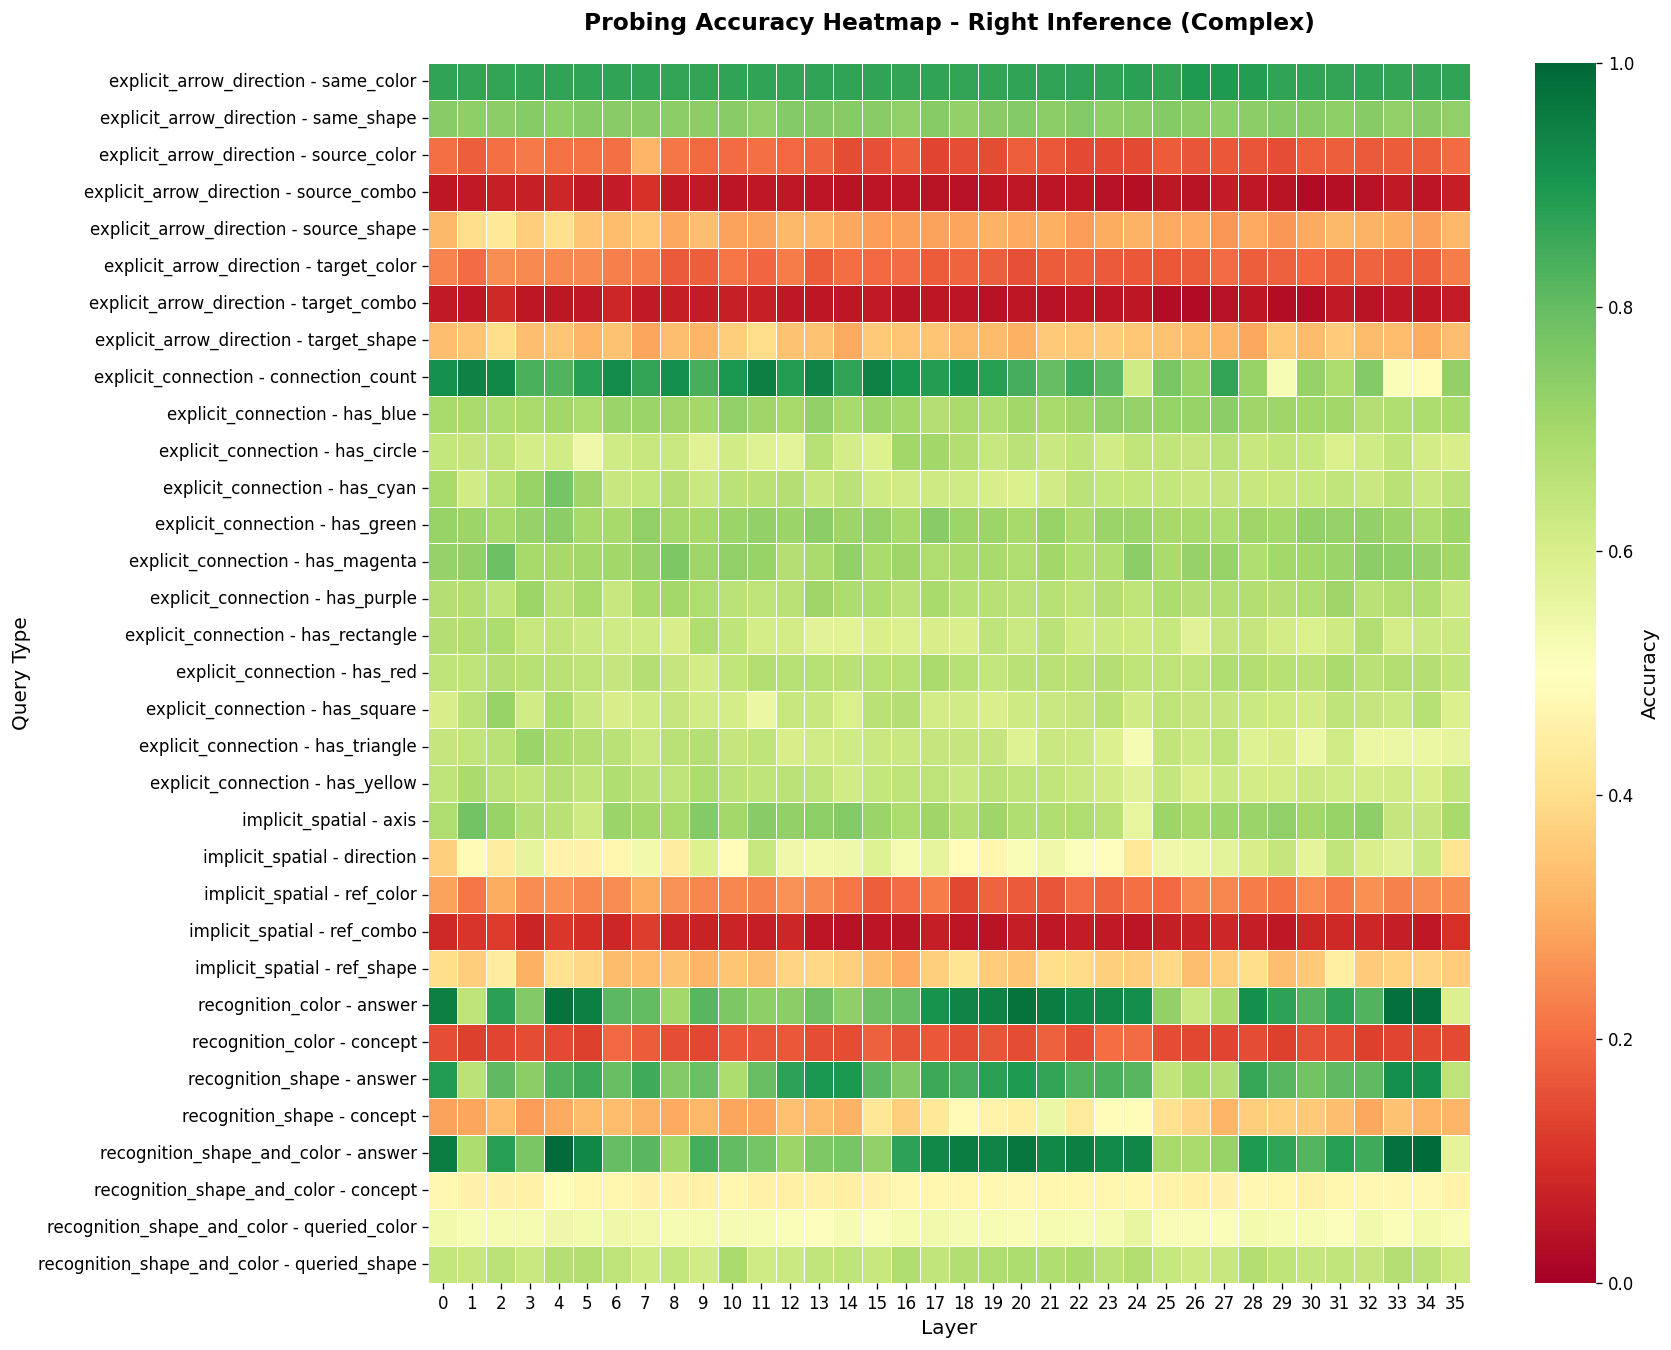

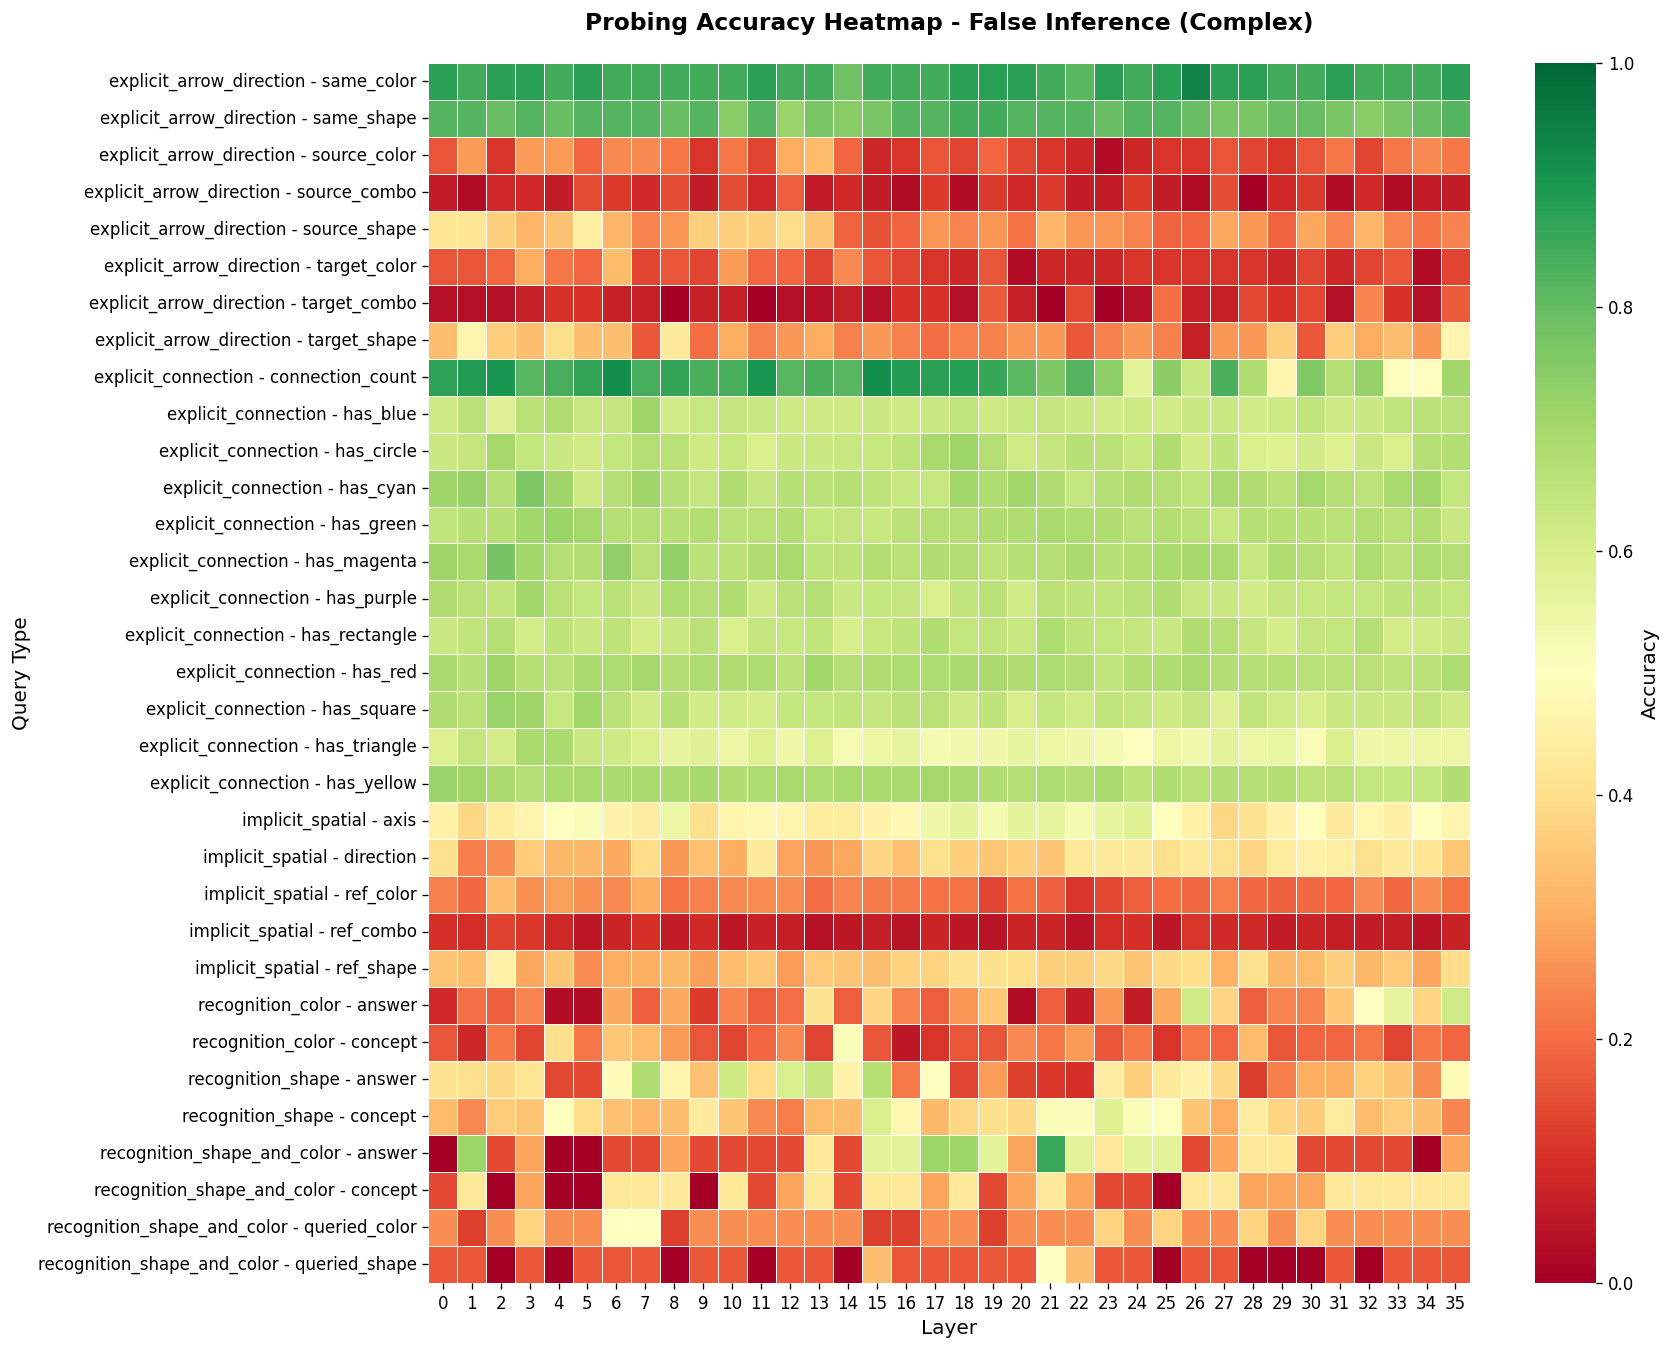

In [24]:
def create_heatmap(df, metric='acc_all', title_suffix='All Inference', filename='heatmap_all.png'):
    """Create heatmap of accuracy across query types and layers"""
    
    # Prepare data for simple types
    if 'label_name' in df.columns:
        # Complex: combine query_type and label_name
        df['full_label'] = df['query_type'] + ' - ' + df['label_name']
        pivot_data = df.pivot_table(values=metric, index='full_label', columns='layer', aggfunc='first')
    else:
        # Simple: just query_type
        pivot_data = df.pivot_table(values=metric, index='query_type', columns='layer', aggfunc='first')
    
    if pivot_data.empty:
        return
    
    # Create figure
    fig, ax = plt.subplots(figsize=(14, max(8, len(pivot_data) * 0.4)))
    
    # Create heatmap
    sns.heatmap(pivot_data, annot=False, fmt='.3f', cmap='RdYlGn', 
                vmin=0, vmax=1, cbar_kws={'label': 'Accuracy'},
                linewidths=0.5, ax=ax)
    
    ax.set_title(f'Probing Accuracy Heatmap - {title_suffix}', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.set_xlabel('Layer', fontsize=12)
    ax.set_ylabel('Query Type', fontsize=12)
    
    plt.show()


create_heatmap(accuracy_df_per_layer, 'acc_all', 'All Inference (Complex)', 'heatmap_complex_all.png')
create_heatmap(accuracy_df_per_layer, 'acc_right', 'Right Inference (Complex)', 'heatmap_complex_right.png')
create_heatmap(accuracy_df_per_layer, 'acc_false', 'False Inference (Complex)', 'heatmap_complex_false.png')




4. Creating difference plots in grid...


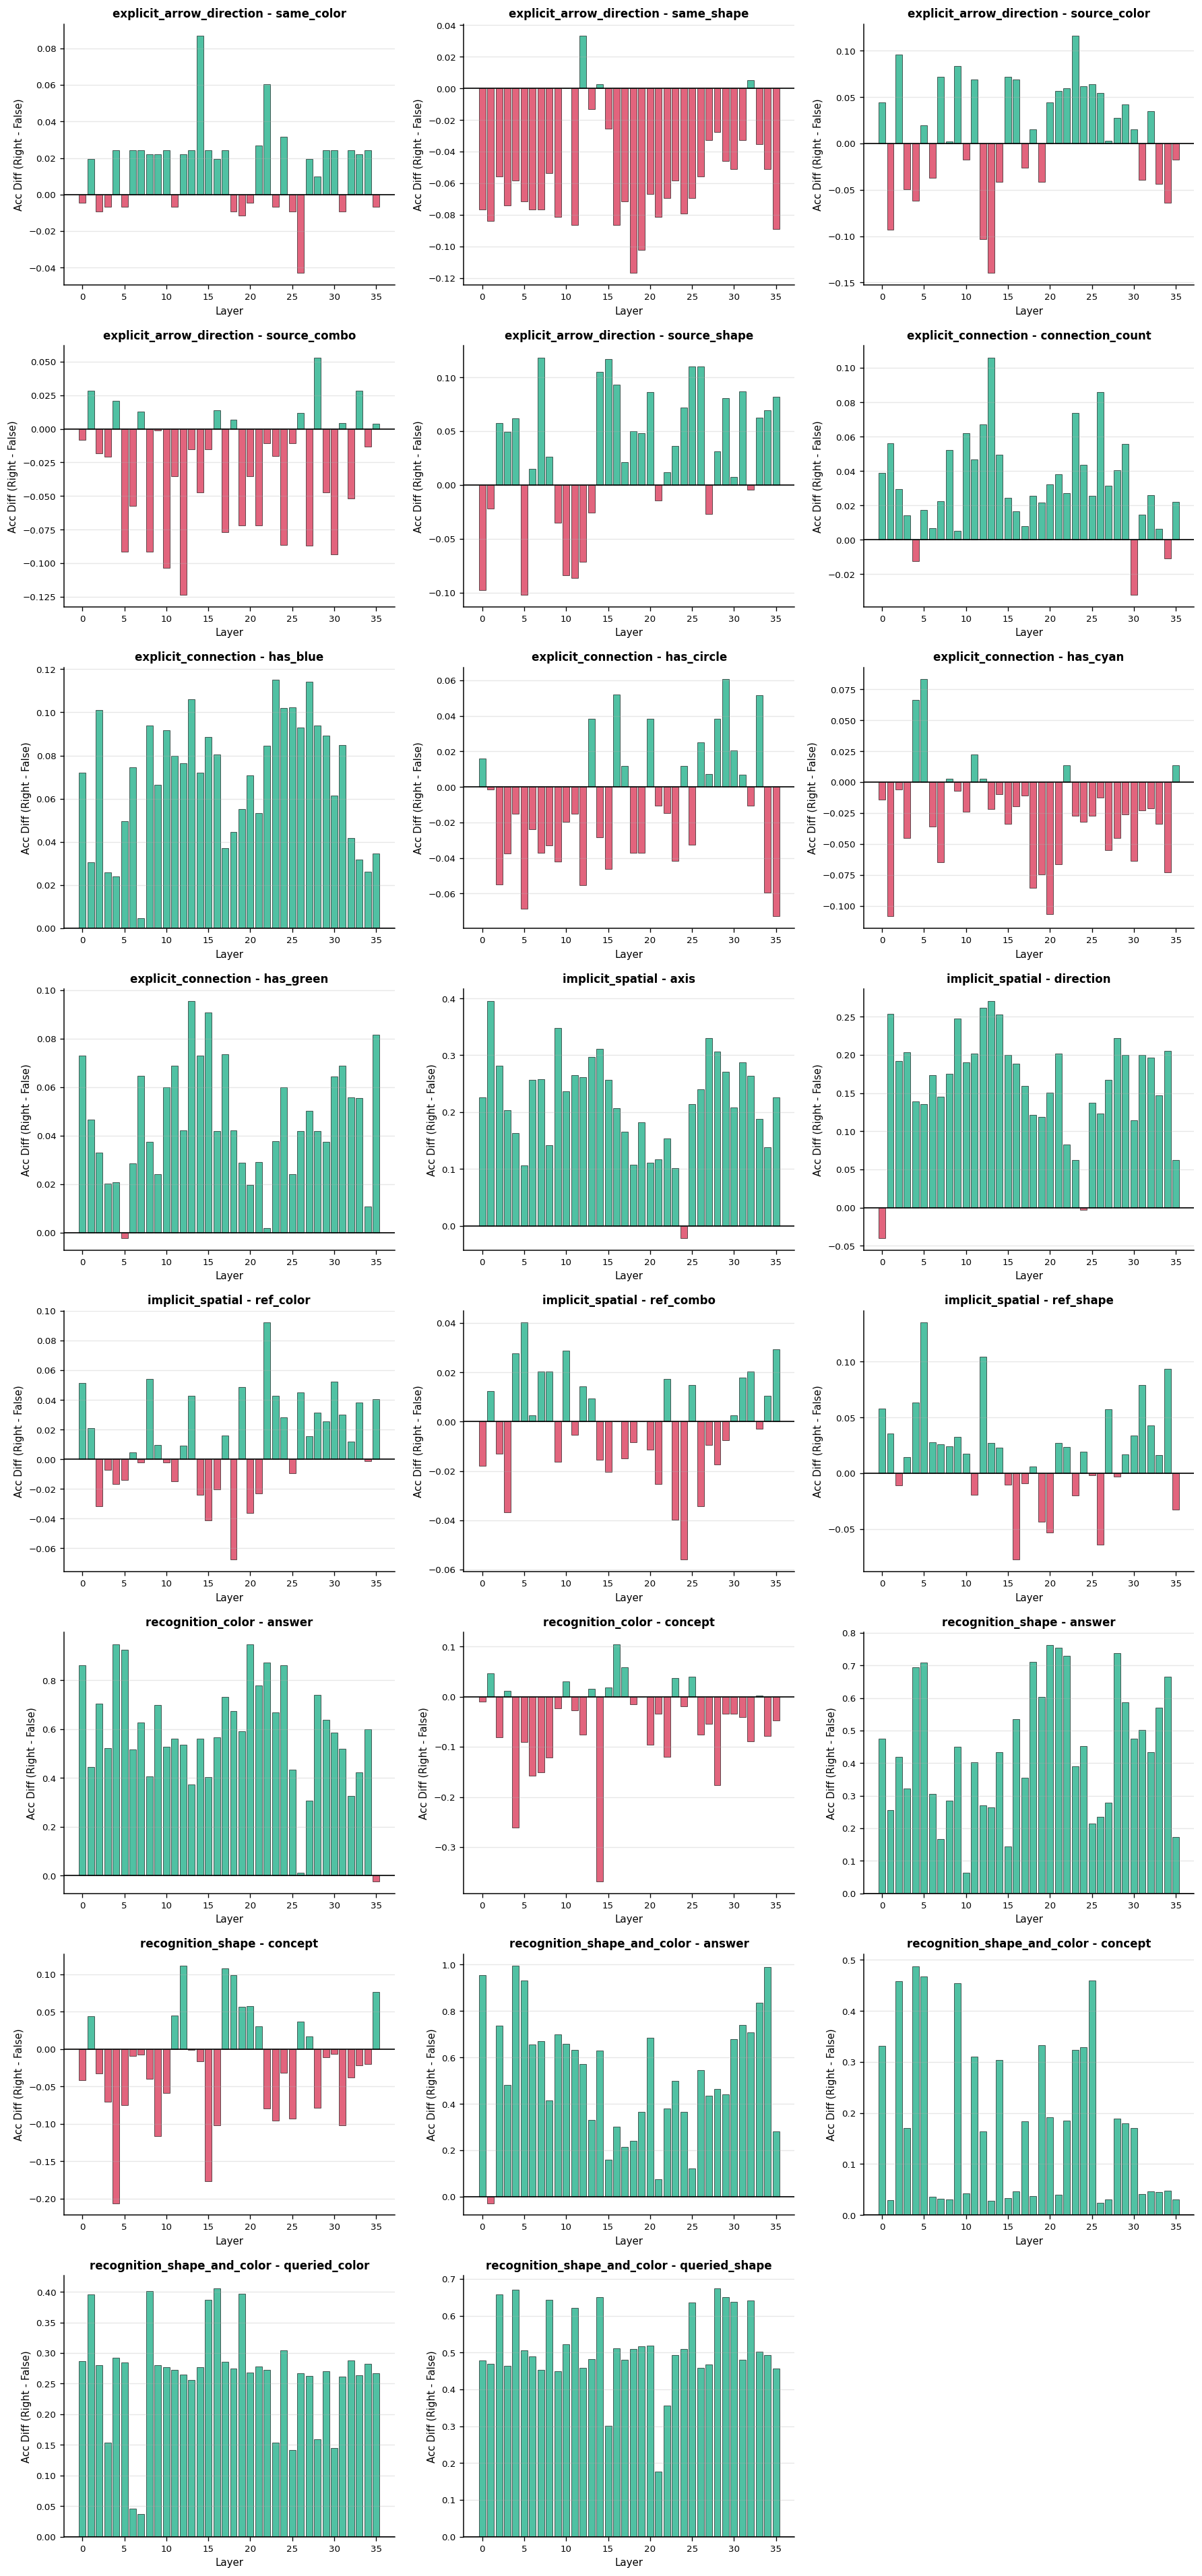

In [26]:
# =========================
# 4. DIFFERENCE PLOTS - Right vs False accuracy (Grid Layout)
# =========================
print("\n4. Creating difference plots in grid...")

def plot_accuracy_difference_grid(df, save_prefix="complex"):
    """Plot difference between right and false inference accuracy in a grid layout"""
    
    # Get unique combinations of query_type and label_name that have both acc_right and acc_false
    valid_data = df[df['acc_right'].notna() & df['acc_false'].notna()]
    combinations = valid_data.groupby(['query_type', 'label_name']).size().reset_index()[['query_type', 'label_name']]
    
    # Limit to first 5 label_names per query_type
    filtered_combinations = []
    for query_type in combinations['query_type'].unique():
        labels = combinations[combinations['query_type'] == query_type]['label_name'].unique()[:5]
        for label_name in labels:
            filtered_combinations.append({'query_type': query_type, 'label_name': label_name})
    
    if len(filtered_combinations) == 0:
        return
    
    # Calculate grid dimensions
    n_plots = len(filtered_combinations)
    n_cols = 3  # You can adjust this
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    # Create figure with subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
    
    # Flatten axes array for easier indexing
    if n_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if n_rows > 1 else axes
    
    # Plot each combination
    for idx, combo in enumerate(filtered_combinations):
        query_type = combo['query_type']
        label_name = combo['label_name']
        
        # Filter data
        data = df[(df['query_type'] == query_type) & (df['label_name'] == label_name)]
        data = data[data['acc_right'].notna() & data['acc_false'].notna()].copy()
        
        if len(data) == 0:
            continue
        
        # Calculate difference
        data['acc_diff'] = data['acc_right'] - data['acc_false']
        
        ax = axes[idx]
        
        # Color bars based on positive/negative difference
        colors = ['#06A77D' if x >= 0 else '#D62246' for x in data['acc_diff']]
        ax.bar(data['layer'], data['acc_diff'], color=colors, alpha=0.7, edgecolor='black', linewidth=0.5)
        
        # Add zero line
        ax.axhline(y=0, color='black', linestyle='-', linewidth=1)
        
        ax.set_xlabel('Layer', fontsize=9)
        ax.set_ylabel('Acc Diff (Right - False)', fontsize=9)
        ax.set_title(f'{query_type} - {label_name}', fontsize=10, fontweight='bold')
        ax.grid(axis='y', alpha=0.3)
        ax.tick_params(labelsize=8)
    
    # Hide unused subplots
    for idx in range(n_plots, len(axes)):
        axes[idx].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Plot all query types in a grid
plot_accuracy_difference_grid(accuracy_df_per_layer, save_prefix="complex")